In [1]:
#importing the libraries which will be used later
import pandas as pd
import numpy as np;
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, time
from datetime import datetime as dt

In [2]:
#Getting the turnstile data from MTA

df1 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_220507.txt")

df2 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_220514.txt")

df3 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_220521.txt")

df4 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_220528.txt")

df5 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_220604.txt")

In [3]:
#After importing weekly data, we have to convert into one table so we use pd.concat function

dfmay = pd.concat([df1,df2, df3, df4, df5], ignore_index=True) 

In [4]:
#Checking for null values as well as the Data types

dfmay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055980 entries, 0 to 1055979
Data columns (total 11 columns):
 #   Column                                                                Non-Null Count    Dtype 
---  ------                                                                --------------    ----- 
 0   C/A                                                                   1055980 non-null  object
 1   UNIT                                                                  1055980 non-null  object
 2   SCP                                                                   1055980 non-null  object
 3   STATION                                                               1055980 non-null  object
 4   LINENAME                                                              1055980 non-null  object
 5   DIVISION                                                              1055980 non-null  object
 6   DATE                                                                  1055980 non-

In [6]:
#Since we have 2 different columns as Date and Time, we are merging them into one datetime column 
#Using *datetime* library

datettimes = pd.to_datetime(dfmay["DATE"] + " " + dfmay["TIME"])

#inserting the datetime column into the dataframe

dfmay.insert(loc = 11,column = "datetime", value = datettimes )

In [7]:
#we have 3 different columns regarding the turnstiles so we merge them as well

turnstiles = dfmay["C/A"] + dfmay["UNIT"] + dfmay["SCP"]

In [8]:
#inserting the turnstiles column into our dataframe

dfmay.insert(loc = 12,column = "turnstile", value = turnstiles )

In [9]:
#Dropping irrelevant data from the datafram in order to enhance the efficiency

dfmay.drop(columns = ["C/A", "UNIT", "SCP", "DATE", "DIVISION", "DESC", "LINENAME"], inplace = True)

In [10]:
#checking the dataframe

dfmay.columns = dfmay.columns.str.strip()

In [11]:
#again check for the datatypes since we have made some modifications regarding the dataframe

dfmay.head()

,STATION,TIME,ENTRIES,EXITS,datetime,turnstile
0,59 ST,00:00:00,7706010,2698804,2022-04-30 00:00:00,A002R05102-00-00
1,59 ST,04:00:00,7706014,2698808,2022-04-30 04:00:00,A002R05102-00-00
2,59 ST,08:00:00,7706017,2698835,2022-04-30 08:00:00,A002R05102-00-00
3,59 ST,12:00:00,7706038,2698924,2022-04-30 12:00:00,A002R05102-00-00
4,59 ST,16:00:00,7706084,2698963,2022-04-30 16:00:00,A002R05102-00-00


In [12]:
dfmay.describe()

,ENTRIES,EXITS
count,1.055980e+06,1.055980e+06
mean,4.325649e+07,3.486197e+07
std,2.243058e+08,1.981461e+08
min,0.000000e+00,0.000000e+00
25%,2.507975e+05,1.338108e+05
50%,1.352306e+06,8.910680e+05
75%,5.956190e+06,3.973416e+06
max,2.147296e+09,2.122326e+09


In [13]:
#since the turnstile data increases cumulatively we have to take the difference between the rows by grouping them by stations

dfmay['net_entry']= dfmay.sort_values(['turnstile','datetime'],ascending = (False, True)).groupby(['turnstile'])['ENTRIES'].diff()
dfmay['net_exits']= dfmay.sort_values(['turnstile','datetime'],ascending = (False, True)).groupby(['turnstile'])['EXITS'].diff()

In [14]:
dfmay.describe()

,ENTRIES,EXITS,net_entry,net_exits
count,1.055980e+06,1.055980e+06,1.050933e+06,1.050933e+06
mean,4.325649e+07,3.486197e+07,-7.436687e+02,-2.042623e+03
std,2.243058e+08,1.981461e+08,4.221974e+05,2.043506e+06
min,0.000000e+00,0.000000e+00,-3.070229e+08,-2.061816e+09
25%,2.507975e+05,1.338108e+05,4.000000e+00,6.000000e+00
50%,1.352306e+06,8.910680e+05,2.800000e+01,3.800000e+01
75%,5.956190e+06,3.973416e+06,9.500000e+01,1.170000e+02
max,2.147296e+09,2.122326e+09,5.539190e+05,2.516514e+08


In [15]:
dfmay[dfmay["net_entry"] < 0]

,STATION,TIME,ENTRIES,EXITS,datetime,turnstile,net_entry,net_exits
1622,57 ST-7 AV,04:00:00,885492370,489192756,2022-04-30 04:00:00,A011R08001-03-00,-27.0,-18.0
1623,57 ST-7 AV,08:00:00,885492363,489192657,2022-04-30 08:00:00,A011R08001-03-00,-7.0,-99.0
1624,57 ST-7 AV,12:00:00,885492328,489192443,2022-04-30 12:00:00,A011R08001-03-00,-35.0,-214.0
1625,57 ST-7 AV,16:00:00,885492271,489192050,2022-04-30 16:00:00,A011R08001-03-00,-57.0,-393.0
1626,57 ST-7 AV,20:00:00,885492180,489191726,2022-04-30 20:00:00,A011R08001-03-00,-91.0,-324.0
...,...,...,...,...,...,...,...,...
1054223,EASTCHSTER/DYRE,05:00:00,1559756746,1728282683,2022-06-03 05:00:00,R730R43100-00-04,-1.0,1.0
1054224,EASTCHSTER/DYRE,09:00:00,1559756611,1728282711,2022-06-03 09:00:00,R730R43100-00-04,-135.0,28.0
1054225,EASTCHSTER/DYRE,13:00:00,1559756587,1728282722,2022-06-03 13:00:00,R730R43100-00-04,-24.0,11.0
1054226,EASTCHSTER/DYRE,17:00:00,1559756550,1728282768,2022-06-03 17:00:00,R730R43100-00-04,-37.0,46.0


In [16]:
dfmay.net_entry = dfmay.net_entry.fillna(0)
dfmay.net_exits = dfmay.net_exits.fillna(0)

In [17]:
dfmay.net_entry = dfmay.net_entry.astype(np.int64)
dfmay.net_exits = dfmay.net_exits.astype(np.int64)

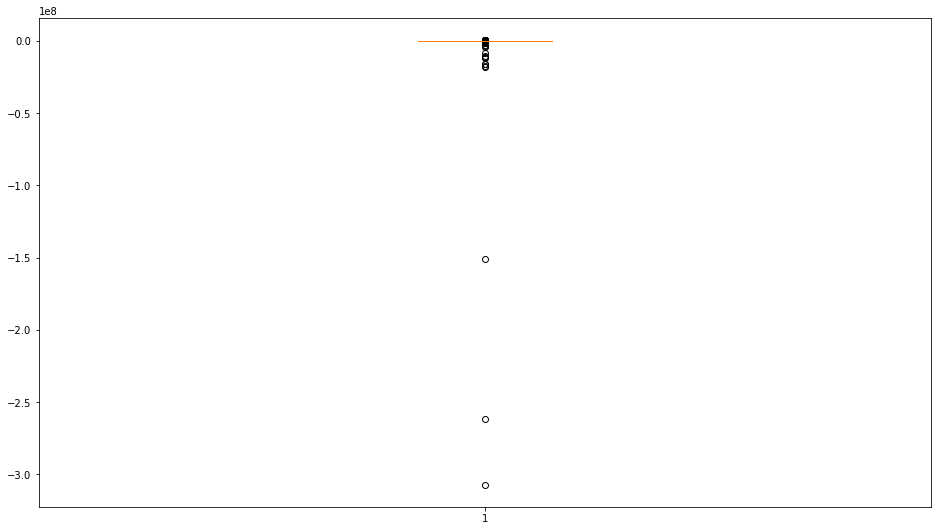

In [18]:
plt.figure(figsize=[16,9])
plt.boxplot(dfmay.net_entry);

<AxesSubplot:xlabel='net_exits'>

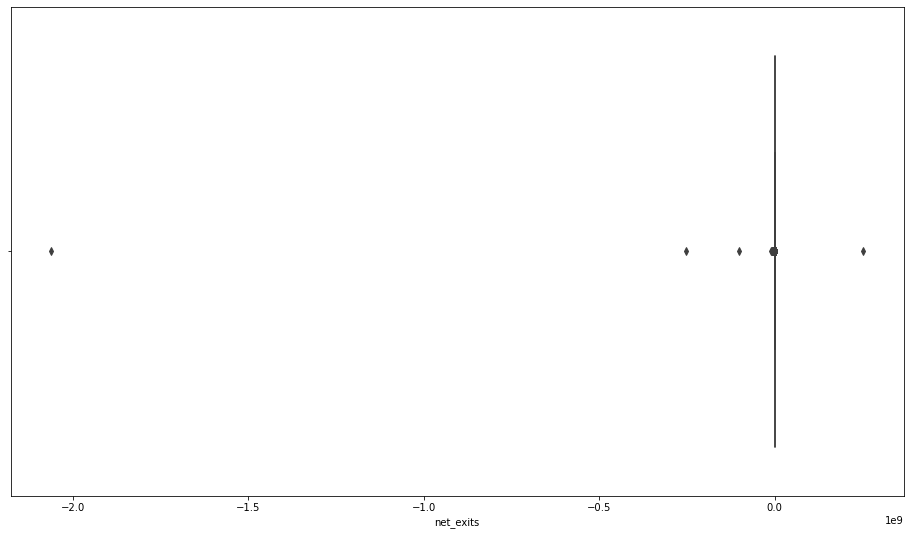

In [19]:
plt.figure(figsize=[16,9])
sns.boxplot(x = dfmay.net_exits)

In [20]:
dfmay[dfmay["net_entry"] < -1000].count()

STATION      125
TIME         125
ENTRIES      125
EXITS        125
datetime     125
turnstile    125
net_entry    125
net_exits    125
dtype: int64

In [21]:
def extract_whiskers(data, iqr_multiplier=1.5):
    median_value = np.median(data) # Median
    upper_quartile = np.percentile(data, 90) # 90%
    lower_quartile = np.percentile(data, 25) # 25% 

    iqr = upper_quartile - lower_quartile #Interquartile Range
    
    print("Upper Whisker:", data[data<=upper_quartile+(iqr_multiplier*iqr)].max()) 
    print("Lower Whisker:", data[data>=lower_quartile-(iqr_multiplier*iqr)].min())

In [22]:
extract_whiskers(dfmay.net_entry)
extract_whiskers(dfmay.net_exits)

Upper Whisker: 479
Lower Whisker: -281
Upper Whisker: 616
Lower Whisker: -360


In [23]:
dfnew = dfmay[(dfmay["net_entry"] < 479) & (dfmay["net_entry"] > -281) & (dfmay["net_exits"] < 616) & (dfmay["net_exits"] > -360)]

In [24]:
dfnew.describe()

,ENTRIES,EXITS,net_entry,net_exits
count,1.030845e+06,1.030845e+06,1.030845e+06,1.030845e+06
mean,4.183696e+07,3.326359e+07,6.268960e+01,7.999810e+01
std,2.196222e+08,1.919182e+08,8.740297e+01,1.105581e+02
min,0.000000e+00,0.000000e+00,-2.800000e+02,-3.590000e+02
25%,2.433070e+05,1.285620e+05,4.000000e+00,6.000000e+00
50%,1.325458e+06,8.602790e+05,2.600000e+01,3.600000e+01
75%,5.868975e+06,3.841967e+06,9.000000e+01,1.090000e+02
max,2.147296e+09,2.122326e+09,4.780000e+02,6.150000e+02


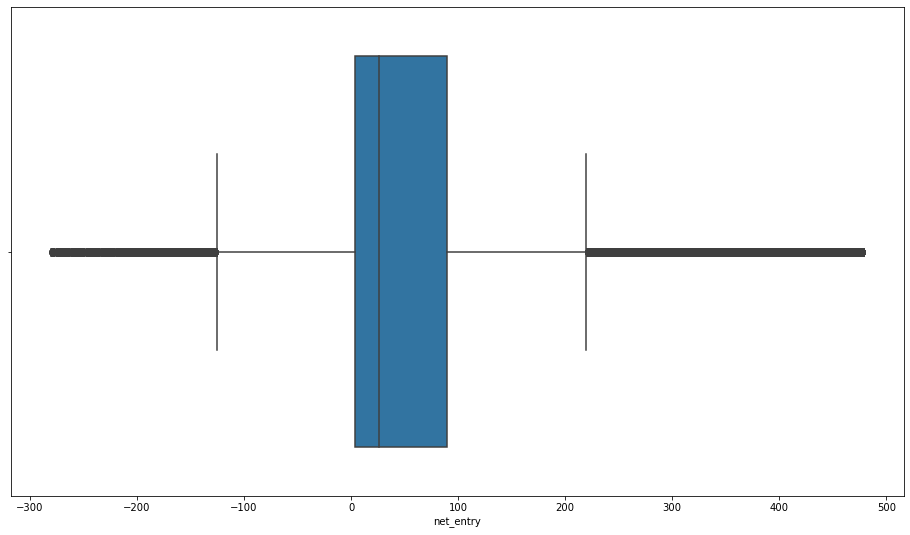

In [25]:
plt.figure(figsize=[16,9])
sns.boxplot(x = dfnew.net_entry);

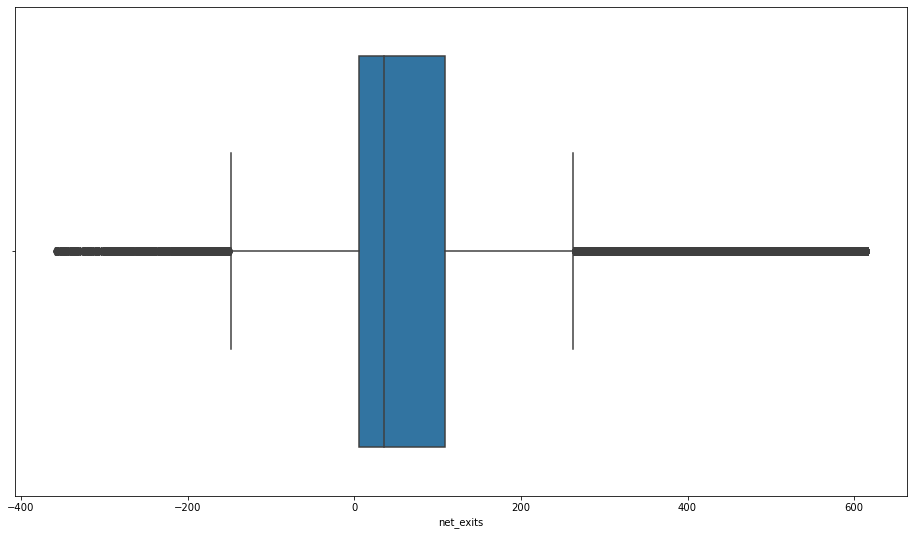

In [26]:
plt.figure(figsize=[16,9])
sns.boxplot(x = dfnew.net_exits);

In [27]:
dfnew[(dfnew["net_entry"] < 0) & (dfnew["TIME"] == "04:00:00")].mean()

C:\Users\yakup\AppData\Local\Temp/ipykernel_1592/269348285.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  dfnew[(dfnew["net_entry"] < 0) & (dfnew["TIME"] == "04:00:00")].mean()
C:\Users\yakup\AppData\Local\Temp/ipykernel_1592/269348285.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfnew[(dfnew["net_entry"] < 0) & (dfnew["TIME"] == "04:00:00")].mean()


ENTRIES      1.137365e+09
EXITS        1.034459e+09
net_entry   -1.257991e+01
net_exits    5.664147e+00
dtype: float64

In [28]:
dfnew[(dfnew["TIME"] == "04:00:00") & (dfnew["net_entry"] > 0)].mean()

C:\Users\yakup\AppData\Local\Temp/ipykernel_1592/1381645299.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  dfnew[(dfnew["TIME"] == "04:00:00") & (dfnew["net_entry"] > 0)].mean()
C:\Users\yakup\AppData\Local\Temp/ipykernel_1592/1381645299.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfnew[(dfnew["TIME"] == "04:00:00") & (dfnew["net_entry"] > 0)].mean()


ENTRIES      3.676624e+07
EXITS        3.119871e+07
net_entry    9.738757e+00
net_exits    2.219433e+01
dtype: float64

In [29]:
dfnew[(dfnew["net_exits"] < 0) & (dfnew["TIME"] == "04:00:00")].mean()

C:\Users\yakup\AppData\Local\Temp/ipykernel_1592/2121543308.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  dfnew[(dfnew["net_exits"] < 0) & (dfnew["TIME"] == "04:00:00")].mean()
C:\Users\yakup\AppData\Local\Temp/ipykernel_1592/2121543308.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfnew[(dfnew["net_exits"] < 0) & (dfnew["TIME"] == "04:00:00")].mean()


ENTRIES      1.108925e+09
EXITS        1.102163e+09
net_entry   -6.815436e+00
net_exits   -2.442114e+01
dtype: float64

In [30]:
dfnew[(dfnew["net_exits"] > 0) & (dfnew["TIME"] == "04:00:00")].mean()

C:\Users\yakup\AppData\Local\Temp/ipykernel_1592/2211699767.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  dfnew[(dfnew["net_exits"] > 0) & (dfnew["TIME"] == "04:00:00")].mean()
C:\Users\yakup\AppData\Local\Temp/ipykernel_1592/2211699767.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfnew[(dfnew["net_exits"] > 0) & (dfnew["TIME"] == "04:00:00")].mean()


ENTRIES      4.094244e+07
EXITS        3.363581e+07
net_entry    8.866129e+00
net_exits    2.206672e+01
dtype: float64

dfnew.net_entry = dfnew.net_entry.abs()

dfnew.net_exits = dfnew.net_exits.abs()

In [31]:
dfnew

,STATION,TIME,ENTRIES,EXITS,datetime,turnstile,net_entry,net_exits
0,59 ST,00:00:00,7706010,2698804,2022-04-30 00:00:00,A002R05102-00-00,0,0
1,59 ST,04:00:00,7706014,2698808,2022-04-30 04:00:00,A002R05102-00-00,4,4
2,59 ST,08:00:00,7706017,2698835,2022-04-30 08:00:00,A002R05102-00-00,3,27
3,59 ST,12:00:00,7706038,2698924,2022-04-30 12:00:00,A002R05102-00-00,21,89
4,59 ST,16:00:00,7706084,2698963,2022-04-30 16:00:00,A002R05102-00-00,46,39
...,...,...,...,...,...,...,...,...
1055975,RIT-ROOSEVELT,05:00:00,0,433,2022-06-03 05:00:00,TRAM2R46900-05-01,0,0
1055976,RIT-ROOSEVELT,09:00:00,0,433,2022-06-03 09:00:00,TRAM2R46900-05-01,0,0
1055977,RIT-ROOSEVELT,13:00:00,0,433,2022-06-03 13:00:00,TRAM2R46900-05-01,0,0
1055978,RIT-ROOSEVELT,17:00:00,0,435,2022-06-03 17:00:00,TRAM2R46900-05-01,0,2


In [32]:
#these columns are not essential since already calculated the net exit and entry in [12]

dfnew.insert(loc = 6, column = "total", value = dfnew["net_entry"] + dfnew["net_exits"])

In [33]:
#Here is the final version of our dataframe

dfnew

,STATION,TIME,ENTRIES,EXITS,datetime,turnstile,total,net_entry,net_exits
0,59 ST,00:00:00,7706010,2698804,2022-04-30 00:00:00,A002R05102-00-00,0,0,0
1,59 ST,04:00:00,7706014,2698808,2022-04-30 04:00:00,A002R05102-00-00,8,4,4
2,59 ST,08:00:00,7706017,2698835,2022-04-30 08:00:00,A002R05102-00-00,30,3,27
3,59 ST,12:00:00,7706038,2698924,2022-04-30 12:00:00,A002R05102-00-00,110,21,89
4,59 ST,16:00:00,7706084,2698963,2022-04-30 16:00:00,A002R05102-00-00,85,46,39
...,...,...,...,...,...,...,...,...,...
1055975,RIT-ROOSEVELT,05:00:00,0,433,2022-06-03 05:00:00,TRAM2R46900-05-01,0,0,0
1055976,RIT-ROOSEVELT,09:00:00,0,433,2022-06-03 09:00:00,TRAM2R46900-05-01,0,0,0
1055977,RIT-ROOSEVELT,13:00:00,0,433,2022-06-03 13:00:00,TRAM2R46900-05-01,0,0,0
1055978,RIT-ROOSEVELT,17:00:00,0,435,2022-06-03 17:00:00,TRAM2R46900-05-01,2,0,2


In [34]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1030845 entries, 0 to 1055979
Data columns (total 9 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   STATION    1030845 non-null  object        
 1   TIME       1030845 non-null  object        
 2   ENTRIES    1030845 non-null  int64         
 3   EXITS      1030845 non-null  int64         
 4   datetime   1030845 non-null  datetime64[ns]
 5   turnstile  1030845 non-null  object        
 6   total      1030845 non-null  int64         
 7   net_entry  1030845 non-null  int64         
 8   net_exits  1030845 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 78.6+ MB


dfnew.to_csv("New_York.csv")

In [38]:
dfnegative = dfnew[dfnew["net_entry"] < 0]

{'whiskers': [<matplotlib.lines.Line2D at 0x1d98e646a30>,
 'caps': [<matplotlib.lines.Line2D at 0x1d98e651190>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d98e6466a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d98e6518b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d98e651c70>],
 'means': []}

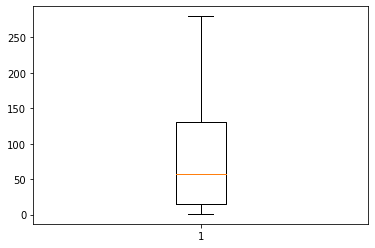

In [45]:
plt.boxplot(dfnegative.net_entry.abs())

In [44]:
dfpositive = dfnew[dfnew["net_entry"] > 0]

{'whiskers': [<matplotlib.lines.Line2D at 0x1d98e5b13a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d98e5b1ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d98e5a6fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d98e5ba220>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d98e5ba5b0>],
 'means': []}

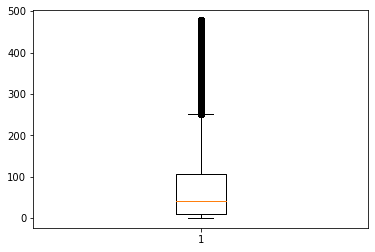

In [41]:
plt.boxplot(dfpositive.net_entry)

In [46]:
dfnegative.describe()

,ENTRIES,EXITS,total,net_entry,net_exits
count,9.165000e+03,9.165000e+03,9165.000000,9165.000000,9165.000000
mean,1.224439e+09,9.680600e+08,-50.209711,-80.784724,30.575014
std,6.287466e+08,6.507293e+08,141.868602,75.665051,130.395211
min,1.000000e+00,0.000000e+00,-611.000000,-280.000000,-359.000000
25%,6.892699e+08,4.087235e+08,-104.000000,-131.000000,-21.000000
50%,1.254551e+09,9.229992e+08,-20.000000,-57.000000,17.000000
75%,1.757704e+09,1.596303e+09,13.000000,-15.000000,87.000000
max,2.147296e+09,2.122326e+09,537.000000,-1.000000,602.000000


In [47]:
dfpositive.describe()

,ENTRIES,EXITS,total,net_entry,net_exits
count,8.636330e+05,8.636330e+05,863633.000000,863633.000000,863633.000000
mean,3.201731e+07,2.563352e+07,169.103288,75.684525,93.418764
std,1.839730e+08,1.621232e+08,167.920780,89.168884,113.609397
min,1.000000e+00,0.000000e+00,-333.000000,1.000000,-359.000000
25%,3.502350e+05,2.209830e+05,37.000000,11.000000,15.000000
50%,1.721167e+06,1.093646e+06,115.000000,42.000000,50.000000
75%,6.293835e+06,4.262044e+06,251.000000,107.000000,129.000000
max,2.116209e+09,2.039322e+09,1082.000000,478.000000,615.000000
